<a href="https://colab.research.google.com/github/Julianacsb/Data-Science/blob/main/Explorando_e_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo os dados

In [ ]:
import pandas as pd
import seaborn as sns

# Customização dos gráficos
import matplotlib.pyplot as plt

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<Axes: ylabel='Frequency'>

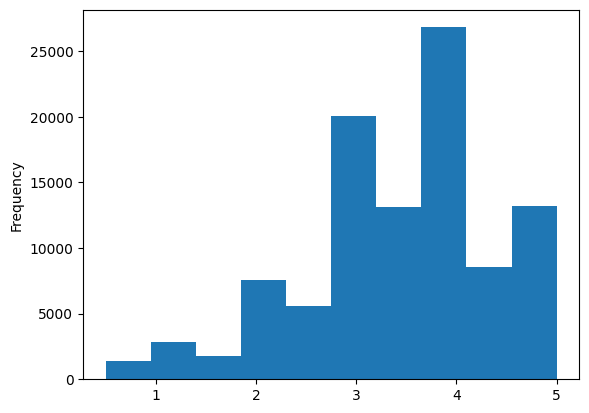

In [ ]:
notas["nota"].plot(kind='hist')

In [ ]:
mediana = notas["nota"].median()
media = notas["nota"].mean()

In [ ]:
notas["nota"].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

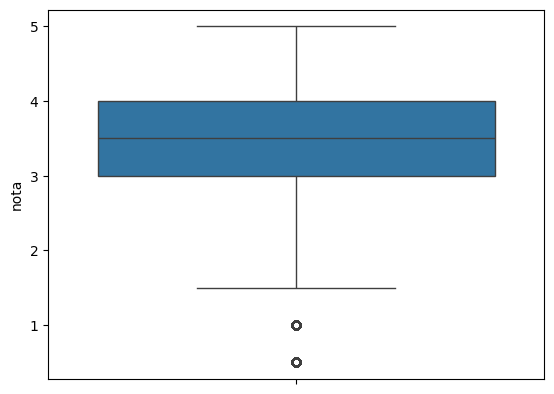

In [ ]:
sns.boxplot(notas["nota"])
# 25% entre 3.5 e 4 e 25% entre 3 e 3.5

**DataFrame**   Um DataFrame é uma estrutura tabular bidimensional, similar a uma planilha ou tabela de banco de dados, onde os dados são organizados em linhas e colunas.

In [ ]:
# DataFrame

import pandas as pd

# Criando um DataFrame simples
dados = { 'Nome': ['Mirla', 'Ana', 'Daniel'],
   'Idade': [25, 30, 35],
              'Salario': [5000, 6000, 8000]}
df = pd.DataFrame(dados)
df

,Nome,Idade,Salario
0,Mirla,25,5000
1,Ana,30,6000
2,Daniel,35,8000


In [ ]:
# observações sobre o DataFrame, como quantidade de registros e colunas, o tipo das variáveis da coluna (object e int64),
# se possuem dados nulos e o uso de memória daqueles dados.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     3 non-null      object
 1   Idade    3 non-null      int64 
 2   Salario  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


**Series** - Um Series por sua vez é uma estrutura unidimensional que armazena uma sequência de valores indexados. Podemos dizer que um DataFrame nada mais é que uma sequência de vários Series nomeados organizados coluna por coluna e ordenados pelos índices.

In [ ]:

# Criando um Series simples
idades = pd.Series([45, 30, 45, 40, 25])

idades.index
idades.sort_values()

,0
4,25
1,30
3,40
0,45
2,45


# Analisando os dados

In [ ]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Busca usando query
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [ ]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

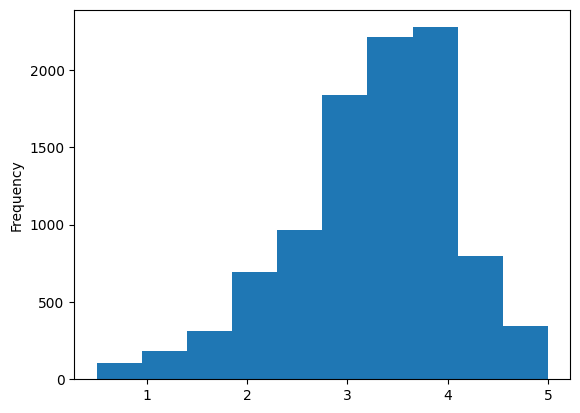

In [ ]:
medias_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'Média de notas por filme')

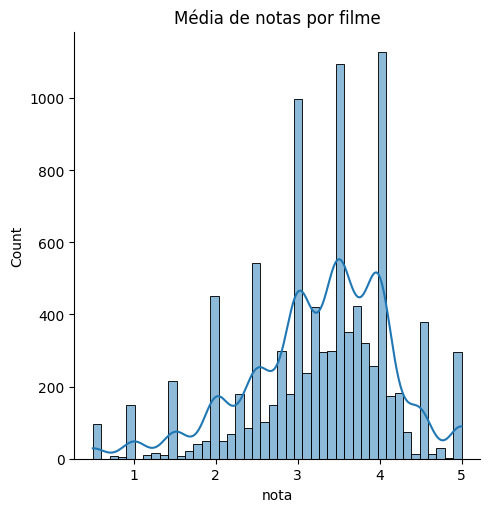

In [ ]:
# Pesquisar por seaborn charts para mais gráficos
# Exploratory Data Analasys
sns.displot(medias_por_filme, kde=True)
plt.title("Média de notas por filme")


# Entendendo os tipos de variáveis

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


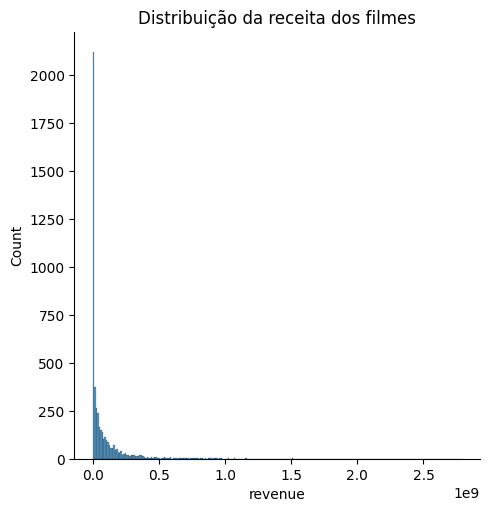

In [ ]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show() # retira o resultado da última linha

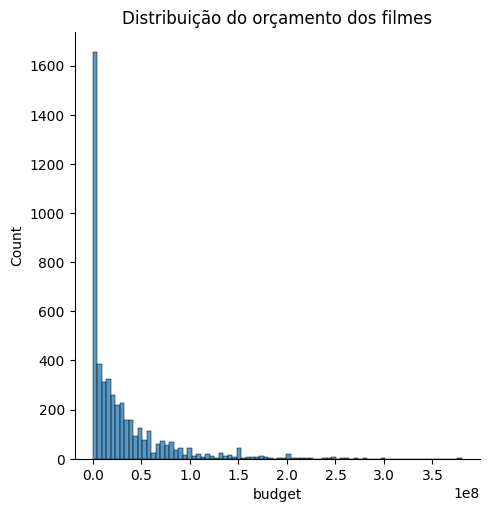

In [ ]:
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show() # retira o resultado da última linha

In [ ]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


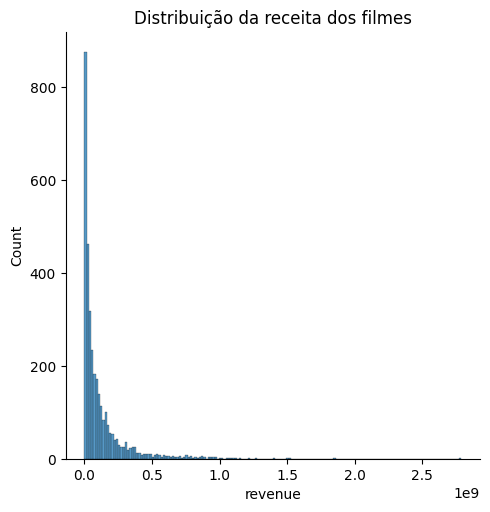

In [ ]:
com_faturamento = tmdb.query("revenue > 0")
sns.displot(com_faturamento["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show() # retira o resultado da última linha

In [ ]:
tmdb["original_language"].unique()
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


**Variável Catagórica** (Qualitativa) - Nominais ou Ordinais

ex: original_languages => sem ordem, nota do movielens => com ordem

**Variável Numérica** (Quantitativa) - Discreta ou Contínua

ex: budget => quantitativa contínua

# Visualizando os dados

In [ ]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


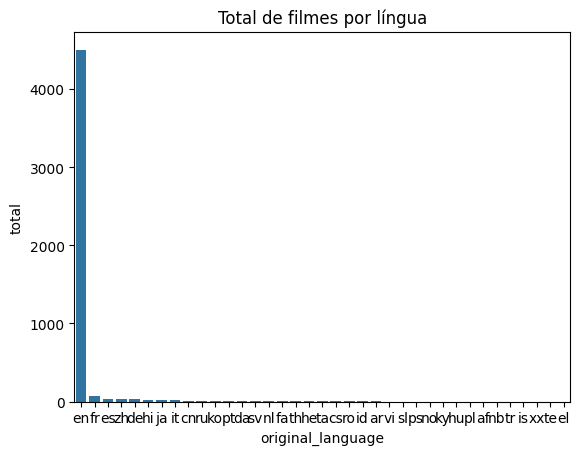

In [ ]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)
plt.title("Total de filmes por língua")
plt.show()

Alguns cenários nos quais os gráficos de pizza e rosca podem ser utilizados:

* Dados de categorias de gêneros homem/mulher/etc;
* Quantidade ou porcentagem de respostas de pesquisas de sim/não;
* Estudantes que concluíram o ensino médio a tempo ou não;
* Outros dados binários/dicotômicos.

* Nunca utilize gráficos 3D e explosão de fatias

    Quanto mais simples e direta for a nossa visualização, menor será o esforço cognitivo exigido de nosso público para compreender os dados apresentados. Os gráficos de pizza já possuem certa complexidade ao relacionar partes com o todo por meio de áreas de setores circulares. A inserção de elementos 3D adiciona uma camada de complexidade ao representar dados em volumes, que não são nada triviais para nossa análise. Além disso, a explosão de fatias desloca as fatias do centro, tornando ainda mais desafiadora a comparação entre elas.

* Quanto menos fatias, melhor
* É ideal posicionar os rótulos próximos aos dados, evitando distrações que prejudiquem a leitura e interpretação dos dados.





In [ ]:
tmdb.query("original_language != 'en'")
total_de_outros_filmes_por_lingua = tmdb.query("original_language != 'en'")["original_language"].value_counts()
total_de_outros_filmes_por_lingua.head()


,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


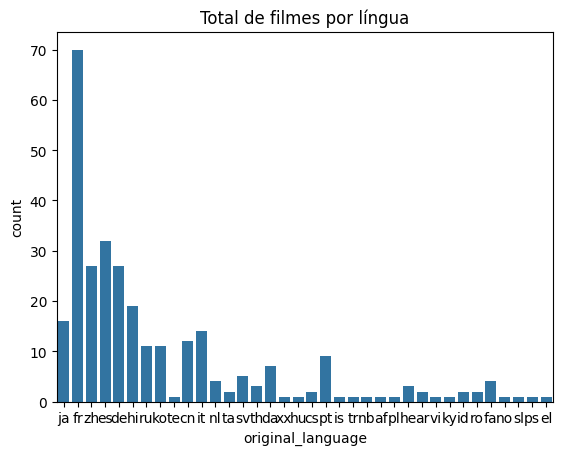

In [ ]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              x="original_language")
plt.title("Total de filmes por língua")
plt.show()

# Ajustando os Visuais

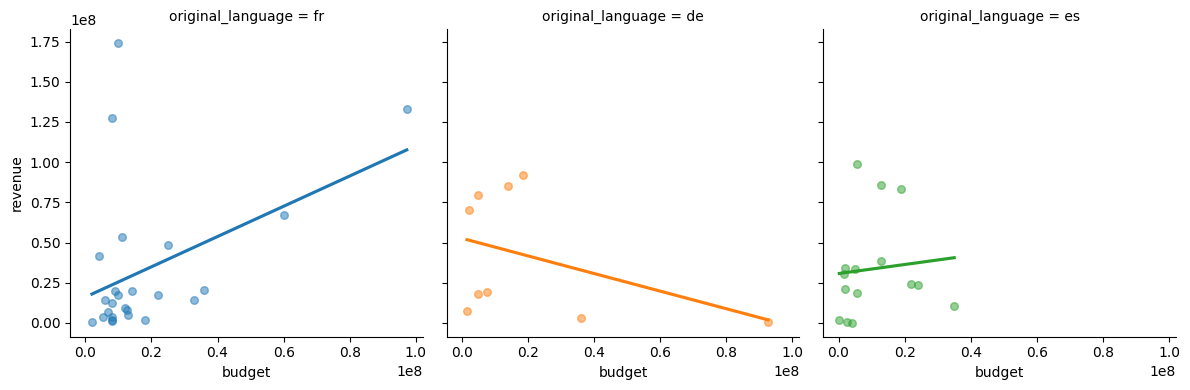

In [ ]:
import pandas as pd
import seaborn as sns

# Importando a base de dados
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Filtrando os dados para as colunas desejadas
dados = tmdb[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "es", "de"]

# Mantendo dados com valores de receita e orçamento válidos e nas línguas desejadas (fr, es, de)
fr_es_de_com_revenue_e_budget = dados.query("revenue > 0 and budget > 0 and original_language == @linguas")

# Construindo o gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(data=fr_es_de_com_revenue_e_budget, x="budget", y="revenue", col="original_language",
           hue="original_language", ci=None, height=4, scatter_kws={"s": 30, "alpha": 0.5})

plt.show()


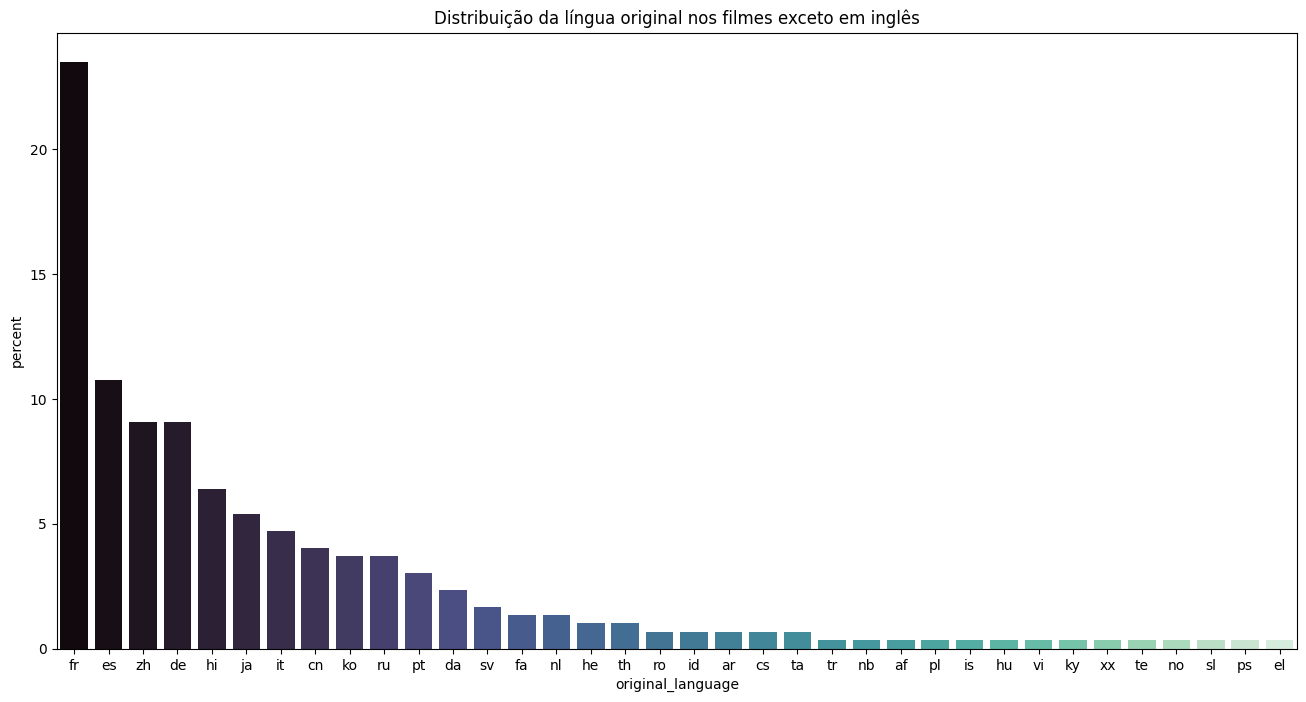

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_de_outros_filmes_por_lingua.index,
              palette="mako",
              hue="original_language",
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat="percent",
              x="original_language")
plt.title("Distribuição da língua original nos filmes exceto em inglês")
plt.show()


# Estatística dos Dados

## Medidas de tendência central e desvio padrão

In [ ]:
import numpy as np

filme0 = [3.0] * 20
filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10
# Média
np.mean (filme0), np.mean (filme1), np.mean (filme2), np.median (filme1), np.median (filme2)

(3.0, 3.0, 3.0, 3.0, 3.0)

In [ ]:
# Desvio Padrão
np.std(filme0), np.std(filme1), np.std(filme2)

(0.0, 0.5, 2.0)